In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [3]:
data = pd.read_csv('drug2024.csv')

In [3]:
data.head()

,Unnamed: 0,link,fsa,name,price,size,image_url,brand,special_feature,item_dimension,...,manufacturer,asin,origin_country,ingredients,about,description,safety,directions,legal,cat
0,0,https://www.amazon.com/Basic-Care-Daytime-Nigh...,FSA or HSA eligible,"Cold and Flu Relief, Daytime and Nighttime Com...",$12.74,48 Count (Pack of 1),https://m.media-amazon.com/images/I/71Yn2+VQcC...,Amazon Basic Care,Non Drowsy,4.38 x 2 x 3.25 inches,...,Perrigo Company - Basic Care,B07BQKPMFM,Canada,Daytime Cold & Flu: Active ingredients (in eac...,\n About this item ACTIVE INGREDIENTS: Com...,\n Compare to the active ingredients in Vicks...,Safety Information Daytime/Nighttime Cold & Fl...,Directions Daytime Cold & Flu Directions: take...,Legal Disclaimer Statements regarding dietary ...,cold
1,1,https://www.amazon.com/TYLENOL-Symptom-Relief-...,FSA or HSA eligible,"Cold + Flu Severe Medicine Caplets for Fever, ...",$7.66,24 Count (Pack of 1),https://m.media-amazon.com/images/I/81ZPNR2nA-...,Tylenol,Targeted,0.79 x 4.52 x 2.91 inches,...,Johnson & Johnson,B009ITR4EY,Italy,Active ingredients (in each caplet) Acetaminop...,\n About this item 24-count of Tylenol Col...,\n Product Description Experience temporary...,Safety Information Liver warning: This product...,Directions Important: Read all product informa...,Legal Disclaimer Statements regarding dietary ...,cold
2,2,https://www.amazon.com/Mucinex-Fast-Max-Streng...,FSA or HSA eligible,Fast-Max Maximum Strength Cold & Flu Day and N...,$15.34,24 Count (Pack of 1),https://m.media-amazon.com/images/I/81l8CSZQAO...,Mucinex,Information already added,1.73 x 3.54 x 4.92 inches,...,Reckitt Benckiser Healthcare,B013Q8JZVM,United Kingdom,Active Ingredients: (Mucinex Fast-Max Day Seve...,\n About this item MAXIMUM STRENGTH MUCINE...,\n Maximum Strength Mucinex Fast-Max Day and ...,NaN,NaN,Legal Disclaimer Statements regarding dietary ...,cold
3,3,https://www.amazon.com/Amazon-Basic-Care-Night...,FSA or HSA eligible,"Night Time Cold & Flu Liquid, Cherry, 12 Fl Oz...",$7.99,12 Fl Oz (Pack of 1),https://m.media-amazon.com/images/I/71BW4K0jaU...,Amazon Basic Care,NaN,2.5 x 2.5 x 7.25 inches,...,PERRIGO COMPANY,B074F297S8,USA,Active ingredients (in each 30 mL): Acetaminop...,\n About this item ACTIVE INGREDIENTS: Act...,\n Compare to Vicks NyQuil Cold & Flu active ...,Safety Information Liver warning: This product...,Directions Take only as directed – see overdos...,Legal Disclaimer Statements regarding dietary ...,cold
4,4,https://www.amazon.com/Theraflu-ExpressMax-Day...,FSA or HSA eligible,"ExpressMax Severe Cold and Cough Medicine, Day...",$12.98,8.3 Fl Oz (Pack of 2),https://m.media-amazon.com/images/I/91sQHZpElF...,Theraflu,NaN,1.63 x 5.75 x 6 inches,...,GlaxoSmithKline,B011VX2FGQ,USA,Theraflu ExpressMax Daytime Severe Cold & Coug...,\n About this item Package contains one 8....,\n Theraflu ExpressMax Severe Cold and Cough ...,NaN,Directions 30 mL of the cold and cough syrup c...,Legal Disclaimer Satisfaction Guarantee If for...,cold


In [5]:
data.shape

(2632, 34)

In [7]:
data.cat.value_counts()

cold    916
dig     678
alg     618
pain    420
Name: cat, dtype: int64

In [9]:
sum(data.rating.isna())

176

In [10]:
2632 - 176

2456

In [16]:
data1 = data[(~data.rating.isna())&(~data.price.isna())]

In [17]:
data1.shape

(2456, 34)

In [19]:
data2 = data1[data1.reviews>100]

In [20]:
data2.shape

(1446, 34)

In [17]:
data[(data.reviews>100)&(~data.rating.isna())].shape

(1446, 34)

# Descriptive analysis

In [4]:
df0 = pd.read_csv('pharmodel_v5.csv')

In [5]:
df1 = pd.read_csv('pharmodel.csv')

In [6]:
df = df0.merge(df1[['asin','count', 'inch', 'weight_in_ounces']], how  = 'left')

In [52]:
#df = df0.merge(df1[])

In [7]:
df.shape

(1445, 176)

In [8]:
df.vp.describe()

count    1445.000000
mean        0.373127
std         0.246792
min         0.018121
25%         0.208968
50%         0.309877
75%         0.480480
max         3.221477
Name: vp, dtype: float64

In [29]:
## distribution plot

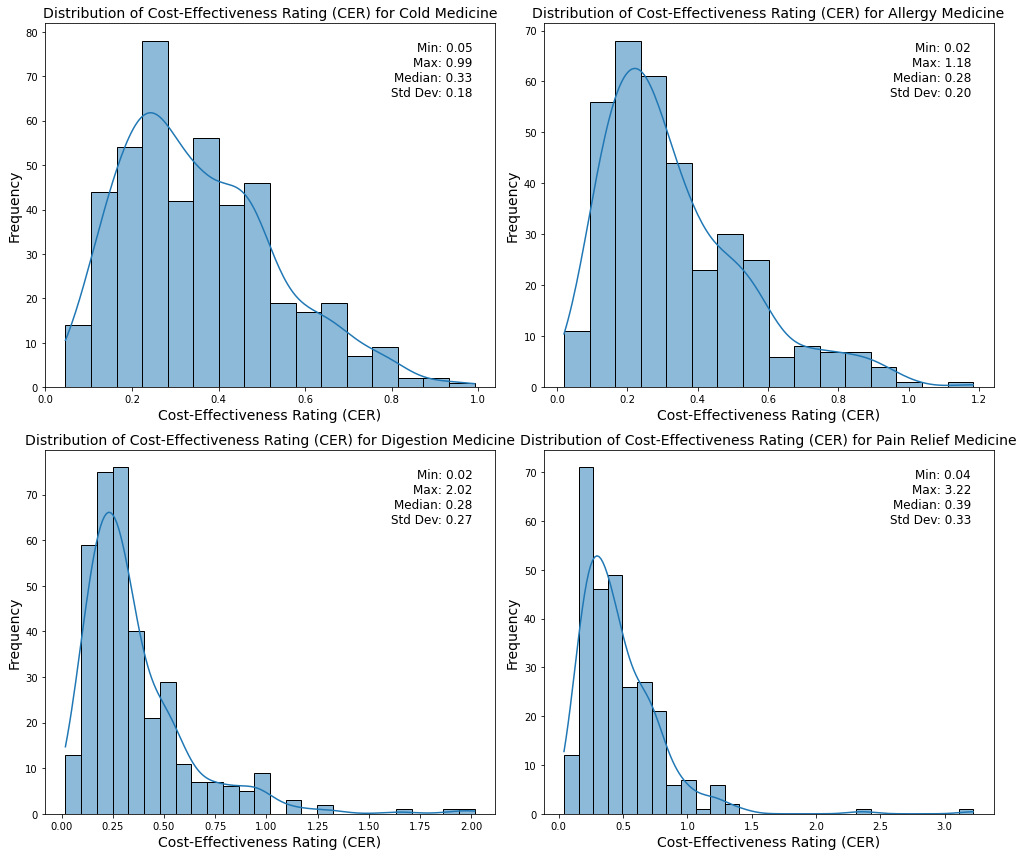

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map categories to their capitalized forms
category_mapping = {'cold': 'Cold', 'alg': 'Allergy', 'dig': 'Digestion', 'pain': 'Pain Relief'}

# Create a list of categories
categories = ['cold', 'alg', 'dig', 'pain']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))  # Increased size

# Iterate through categories and create distribution plots
for cat, ax in zip(categories, axes.flatten()):
    sns.histplot(data=df[df['cat'] == cat], x='vp', kde=True, ax=ax)
    ax.set_title(f'Distribution of Cost-Effectiveness Rating (CER) for {category_mapping[cat]} Medicine', fontsize=14)  # Title font size
    ax.set_xlabel('Cost-Effectiveness Rating (CER)', fontsize=14)  # X-axis label font size
    ax.set_ylabel('Frequency', fontsize=14)  # Y-axis label font size

    # Calculate statistics
    vp_data = df[df['cat'] == cat]['vp']
    min_vp = vp_data.min()
    max_vp = vp_data.max()
    median_vp = vp_data.median()
    std_vp = vp_data.std()

    # Add text annotation with statistics
    ax.text(0.95, 0.95, f"Min: {min_vp:.2f}\nMax: {max_vp:.2f}\nMedian: {median_vp:.2f}\nStd Dev: {std_vp:.2f}",
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')  # Adjusted position

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
## fsa

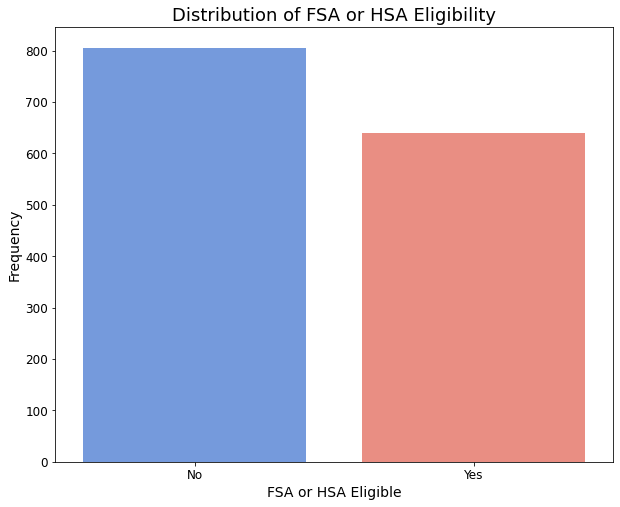

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a countplot for the binary variable with specified colors
sns.countplot(data=df, x='fsa_flg', palette=['cornflowerblue', 'salmon'])

# Set labels and title with increased font sizes
plt.xlabel('FSA or HSA Eligible', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of FSA or HSA Eligibility', fontsize=18)

# Set x-axis labels to Yes/No
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=12)

# Set y-axis label size
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [66]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filter out NaN values before calculating the 95th percentile
# valid_count = df['count'].dropna()
# valid_inch = df['inch'].dropna()
# valid_weight = df['weight_in_ounces'].dropna()

# # Calculate the 95th percentile for each variable
# count_limit = np.percentile(valid_count, 95)
# inch_limit = np.percentile(valid_inch, 95)
# weight_limit = np.percentile(valid_weight, 95)

# # Set up the plot
# plt.figure(figsize=(15, 5))

# # Create subplots for each variable
# plt.subplot(1, 3, 1)
# sns.histplot(valid_count, bins=20, kde=True)
# plt.title('Distribution of Counts per Pack')
# plt.xlabel('Count')
# plt.ylabel('Frequency')
# plt.xlim(0, count_limit)  # Limit x-axis range for 'count' variable

# plt.subplot(1, 3, 2)
# sns.histplot(valid_inch, bins=5, kde=True)
# plt.title('Distribution of Inches')
# plt.xlabel('Inches')
# plt.ylabel('Frequency')
# plt.xlim(0, inch_limit)  # Limit x-axis range for 'inch' variable

# plt.subplot(1, 3, 3)
# sns.histplot(valid_weight, bins=20, kde=True)
# plt.title('Distribution of Weight (in ounces)')
# plt.xlabel('Weight (ounces)')
# plt.ylabel('Frequency')
# plt.xlim(0, weight_limit)  # Limit x-axis range for 'weight_in_ounces' variable

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()

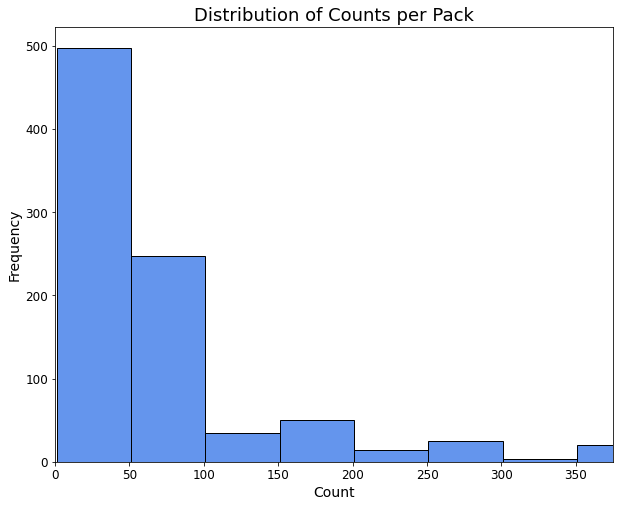

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out NaN values before calculating the 95th percentile
valid_count = df['count'].dropna()

# Calculate the 95th percentile for 'count' variable
count_limit = np.percentile(valid_count, 95)

# Set up the plot
plt.figure(figsize=(10, 8))

# Create histogram for counts per pack with specified color
plt.hist(valid_count, bins=20, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Counts per Pack', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, count_limit)  # Limit x-axis range for 'count' variable

# Show plot
plt.show()

# Brand

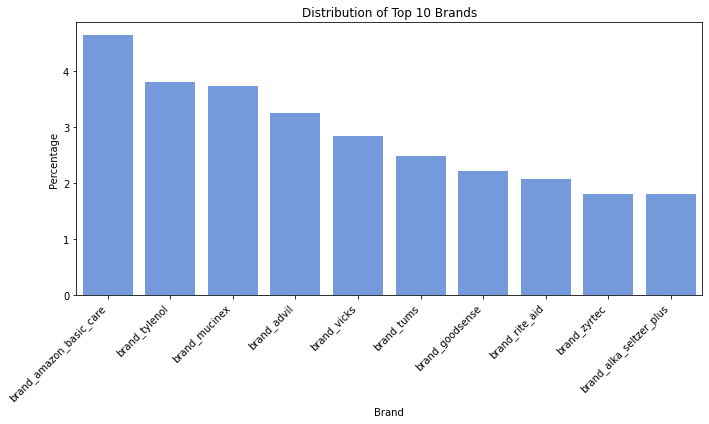

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each brand
brand_counts = df[['brand_zyrtec', 'brand_zicam', 'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 
                   'brand_tums', 'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids', 
                   'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec', 'brand_prelief', 
                   'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium', 'brand_natures_way', 
                   'brand_mylanta', 'brand_mucinex', 'brand_motrin', 'brand_midol', 'brand_major', 
                   'brand_hylands', 'brand_goodsense', 'brand_gaviscon', 'brand_flonase', 
                   'brand_excedrin', 'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic', 
                   'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care', 'brand_allegra', 
                   'brand_alka_seltzer_plus', 'brand_alka_seltzer', 'brand_aleve', 'brand_airborne', 
                   'brand_advil', 'brand_a2z_store']].sum()

# Calculate the percentage for each brand
brand_percentage = (brand_counts / len(df)) * 100

# Select the top 10 brands
top_10_brands = brand_percentage.nlargest(10)

# Extract brand names without 'brand_' and capitalize first letter
#top_10_brands.index = [brand.split('_')[-1].capitalize() for brand in top_10_brands.index]

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 brands
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#[Amazon Basic Care, Tylenol, Mucinex, Advil, Vicks, TUMS, GoodSense,Rite Aid, Zyrtec, Alka-Seltzer Plus]

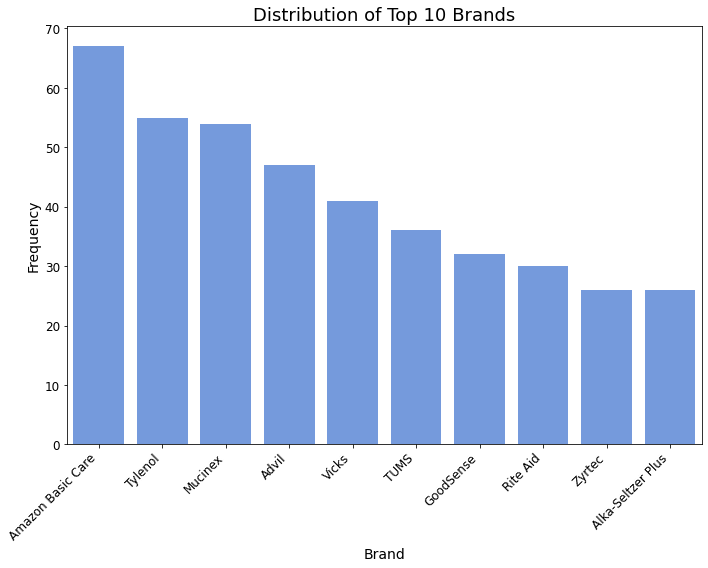

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each brand
brand_counts = df[['brand_zyrtec', 'brand_zicam', 'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 
                   'brand_tums', 'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids', 
                   'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec', 'brand_prelief', 
                   'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium', 'brand_natures_way', 
                   'brand_mylanta', 'brand_mucinex', 'brand_motrin', 'brand_midol', 'brand_major', 
                   'brand_hylands', 'brand_goodsense', 'brand_gaviscon', 'brand_flonase', 
                   'brand_excedrin', 'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic', 
                   'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care', 'brand_allegra', 
                   'brand_alka_seltzer_plus', 'brand_alka_seltzer', 'brand_aleve', 'brand_airborne', 
                   'brand_advil', 'brand_a2z_store']].sum()

# Calculate the frequency for each brand
brand_frequency = brand_counts.nlargest(10)

# Rename brands and switch back to frequency
brand_frequency.index = ['Amazon Basic Care', 'Tylenol', 'Mucinex', 'Advil', 'Vicks', 'TUMS', 
                         'GoodSense', 'Rite Aid', 'Zyrtec', 'Alka-Seltzer Plus']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 brands
sns.barplot(x=brand_frequency.index, y=brand_frequency.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Brands', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Manufacturer

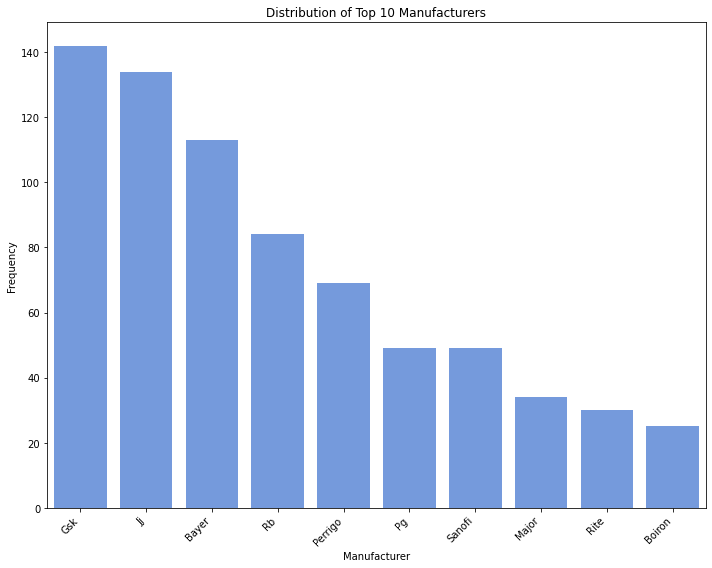

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each manufacturer
manufacturer_counts = df[['manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
                          'manu_pg', 'manu_sanofi', 'manu_major', 'manu_rite',
                          'manu_boiron', 'manu_pfizer', 'manu_hyland', 'manu_alka',
                          'manu_allegiant', 'manu_prestige', 'manu_dwight', 'manu_emc', 'manu_nw',
                          'manu_walmart', 'manu_kirkland', 'manu_ohm', 'manu_reddy',
                          'manu_bionpharma', 'manu_time']].sum()

# Select the top 10 manufacturers
top_10_manufacturers = manufacturer_counts.nlargest(10)

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 manufacturers
sns.barplot(x=top_10_manufacturers.index.str.replace('manu_', '').str.capitalize(), y=top_10_manufacturers.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [86]:
top_10_manufacturers.index

Index(['manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
       'manu_pg', 'manu_sanofi', 'manu_major', 'manu_rite', 'manu_boiron'],
      dtype='object')

In [ ]:
#[GSK, Johnson & Johnson, Bayer, Reckitt Benckiser, Perrigo, Procter & Gamble, Sanofi, Major, Rite Aid, Boiron]

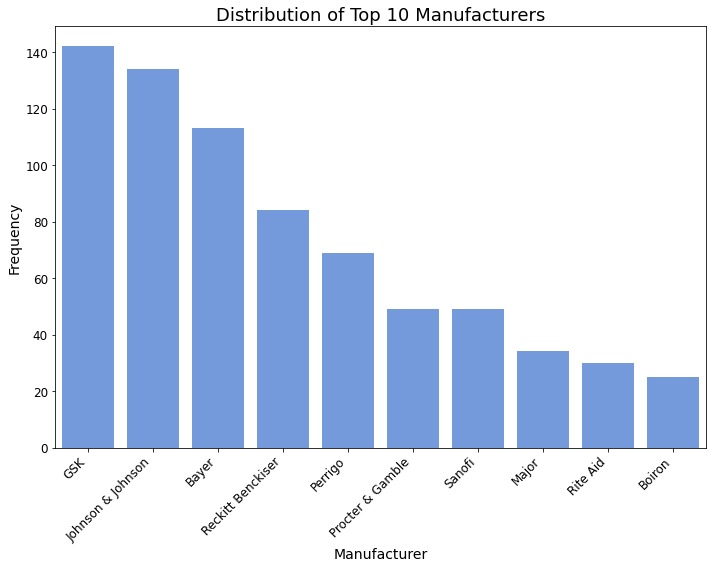

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each manufacturer
manufacturer_counts = df[['manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
                          'manu_pg', 'manu_sanofi', 'manu_major', 'manu_rite',
                          'manu_boiron']].sum()

# Rename manufacturers
manufacturer_counts.index = ['GSK', 'Johnson & Johnson', 'Bayer', 'Reckitt Benckiser', 'Perrigo',
                             'Procter & Gamble', 'Sanofi', 'Major', 'Rite Aid', 'Boiron']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 manufacturers
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Manufacturers', fontsize=18)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Active Ingredients

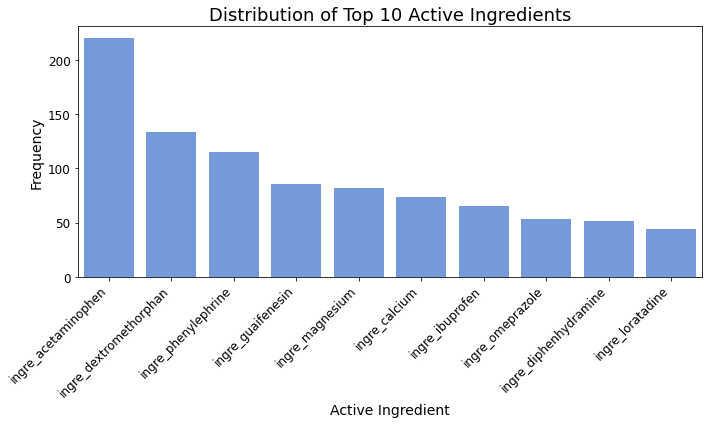

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each active ingredient
ingredient_counts = df[['ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
                        'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
                        'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
                        'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine',
                        'ingre_kali', 'ingre_ipecacuanha', 'ingre_ibuprofen',
                        'ingre_hydrobromide', 'ingre_guaifenesin', 'ingre_gelsemium',
                        'ingre_fexofenadine', 'ingre_famotidine', 'ingre_eupatorium',
                        'ingre_eucalyptus', 'ingre_esomeprazole', 'ingre_echinacea',
                        'ingre_doxylamine', 'ingre_diphenhydramine', 'ingre_dextromethorphan',
                        'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
                        'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
                        'ingre_acetaminophen']].sum()

# Select the top 10 active ingredients
top_10_ingredients = ingredient_counts.nlargest(10)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create bar plot for the top 10 active ingredients
sns.barplot(x=top_10_ingredients.index, y=top_10_ingredients.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Active Ingredients', fontsize=18)
plt.xlabel('Active Ingredient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [89]:
top_10_ingredients.index

Index(['ingre_acetaminophen', 'ingre_dextromethorphan', 'ingre_phenylephrine',
       'ingre_guaifenesin', 'ingre_magnesium', 'ingre_calcium',
       'ingre_ibuprofen', 'ingre_omeprazole', 'ingre_diphenhydramine',
       'ingre_loratadine'],
      dtype='object')

In [ ]:
[Acetaminophen, Dextromethorphan, Phenylephrine, Guaifenesin, Magnesium, Calcium,Ibuprofen, 
 Omeprazole, Diphenhydramine,Loratadine   ]

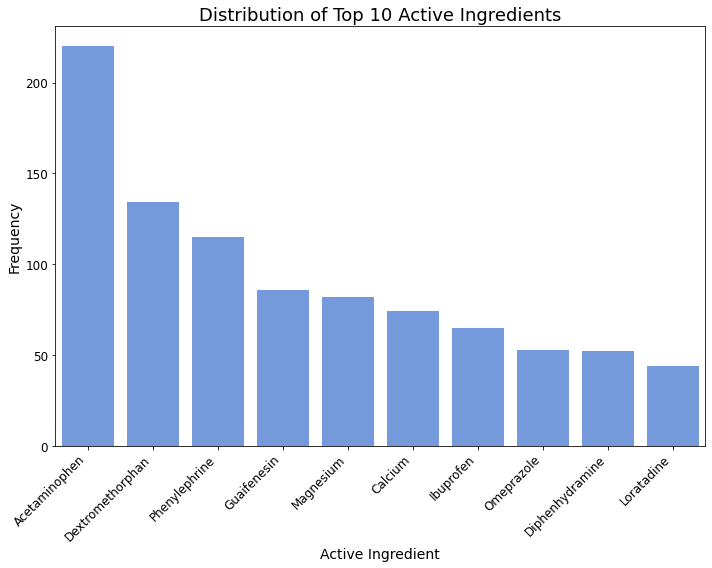

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the dummy variables for each active ingredient
ingredient_counts = df[['ingre_acetaminophen', 'ingre_dextromethorphan', 'ingre_phenylephrine',
                        'ingre_guaifenesin', 'ingre_magnesium', 'ingre_calcium',
                        'ingre_ibuprofen', 'ingre_omeprazole', 'ingre_diphenhydramine',
                        'ingre_loratadine']].sum()

# Rename active ingredients
ingredient_counts.index = ['Acetaminophen', 'Dextromethorphan', 'Phenylephrine', 'Guaifenesin', 'Magnesium', 
                           'Calcium', 'Ibuprofen', 'Omeprazole', 'Diphenhydramine', 'Loratadine']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 active ingredients
sns.barplot(x=ingredient_counts.index, y=ingredient_counts.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Active Ingredients', fontsize=18)
plt.xlabel('Active Ingredient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


# effects

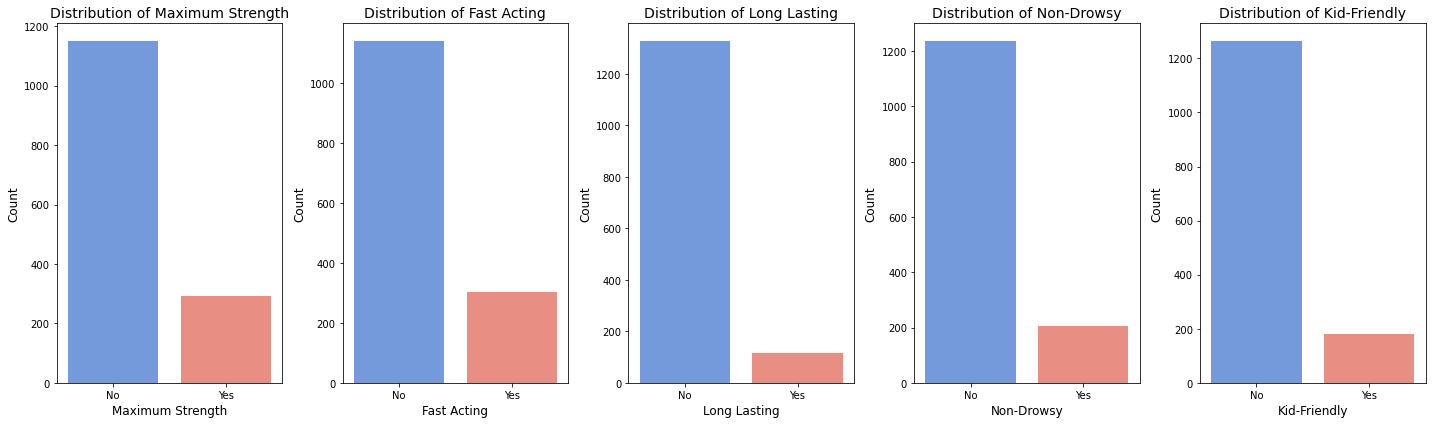

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# List of special effects
effects = ['Maximum Strength', 'Fast Acting', 'Long Lasting', 'Non-Drowsy', 'Kid-Friendly']

# Corresponding column names in the DataFrame
columns = ['eff_max_str', 'eff_fast_acting', 'eff_long_lasting', 'eff_non_drowsy', 'eff_kid']

# Iterate through each special effect
for i, (effect, column) in enumerate(zip(effects, columns)):
    # Create countplot for the current special effect
    sns.countplot(data=df, x=column, ax=axes[i], palette=['cornflowerblue', 'salmon'])
    axes[i].set_title(f'Distribution of {effect}', fontsize=14)
    axes[i].set_xlabel(effect, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xticklabels(['No', 'Yes'], fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

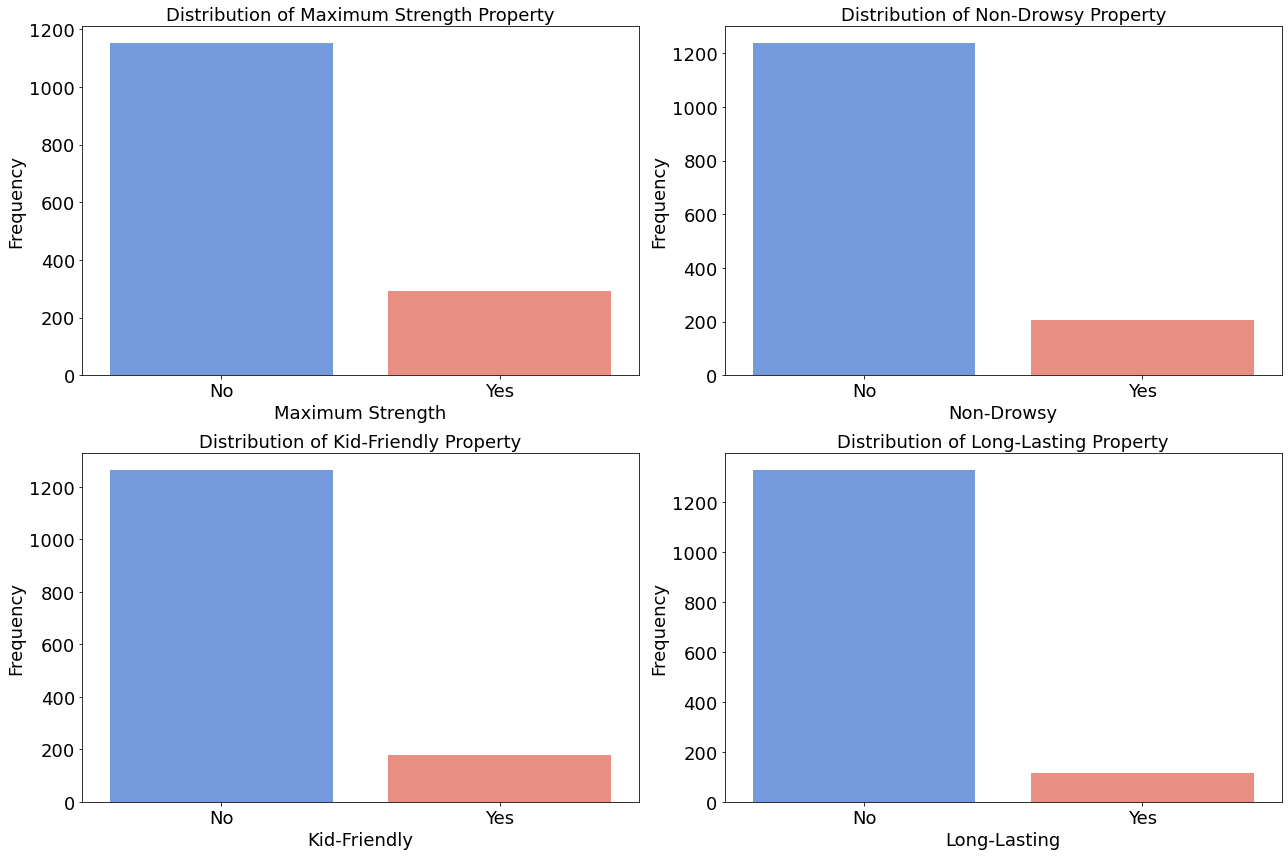

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# List of special effects
effects = ['Maximum Strength', 'Non-Drowsy', 'Kid-Friendly', 'Long-Lasting']

# Corresponding column names in the DataFrame
columns = ['eff_max_str', 'eff_non_drowsy', 'eff_kid', 'eff_long_lasting']

# Iterate through each special effect
for i, (effect, column) in enumerate(zip(effects, columns)):
    row = i // 2
    col = i % 2
    # Create countplot for the current special effect
    sns.countplot(data=df, x=column, ax=axes[row, col], palette=['cornflowerblue', 'salmon'])
    axes[row, col].set_title(f'Distribution of {effect} Property', fontsize=18)
    axes[row, col].set_xlabel(effect, fontsize=18)
    axes[row, col].set_ylabel('Frequency', fontsize=18)
    axes[row, col].set_xticklabels(['No', 'Yes'], fontsize=18)
    axes[row, col].tick_params(axis='y', labelsize=18)  # Set y-axis tick label size

# Adjust layout
plt.tight_layout()
plt.show()

# Symptom

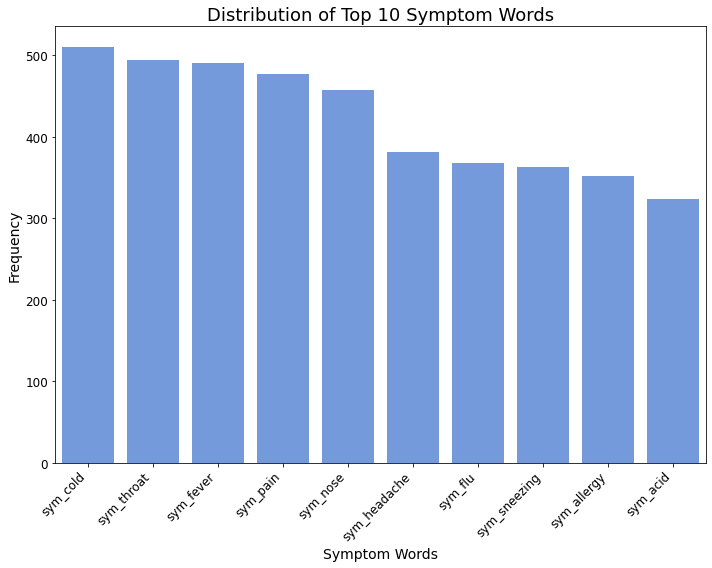

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of symptoms
symptoms = ['sym_throat', 'sym_stomach', 'sym_sneezing', 'sym_sinus', 
            'sym_pain', 'sym_nose', 'sym_nausea', 'sym_nasal', 'sym_migranie', 
            'sym_menstrual', 'sym_itchy', 'sym_heart', 'sym_headache', 'sym_flu',
            'sym_fever', 'sym_eyes', 'sym_digestion', 'sym_cough', 'sym_cold', 'sym_chest',
            'sym_arthritis', 'sym_allergy', 'sym_acid']

# Sum up the dummy variables for each symptom
symptom_counts = df[symptoms].sum()

# Select the top 10 symptoms
top_10_symptoms = symptom_counts.nlargest(10)

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 symptoms
sns.barplot(x=top_10_symptoms.index, y=top_10_symptoms.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Symptom Words', fontsize=18)
plt.xlabel('Symptom Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [133]:
top_10_symptoms.index

Index(['sym_cold', 'sym_throat', 'sym_fever', 'sym_pain', 'sym_nose',
       'sym_headache', 'sym_flu', 'sym_sneezing', 'sym_allergy', 'sym_acid'],
      dtype='object')

In [ ]:
#[Cold, Throat, Fever, Pain, Nose, Headache, Flu, Sneezing, Allergy, Acid]

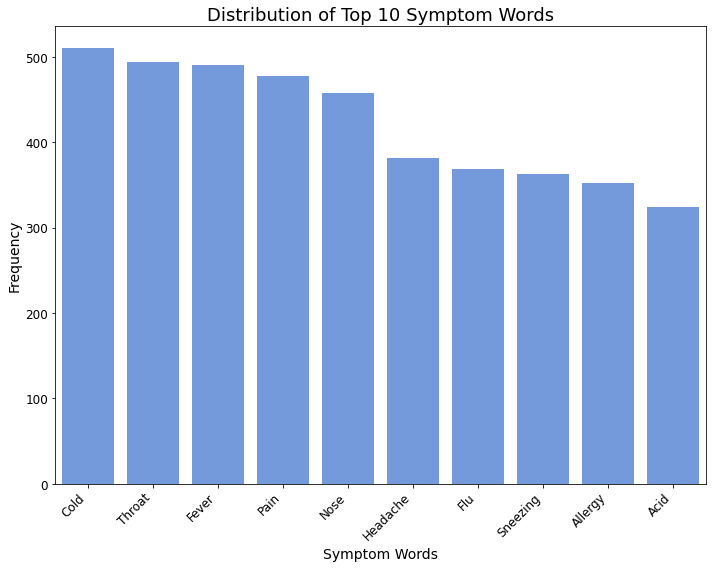

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of symptoms
symptoms = ['sym_cold', 'sym_throat', 'sym_fever', 'sym_pain', 'sym_nose',
            'sym_headache', 'sym_flu', 'sym_sneezing', 'sym_allergy', 'sym_acid']

# Sum up the dummy variables for each symptom
symptom_counts = df[symptoms].sum()

# Rename symptom words
symptom_counts.index = ['Cold', 'Throat', 'Fever', 'Pain', 'Nose',
                        'Headache', 'Flu', 'Sneezing', 'Allergy', 'Acid']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 symptoms
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Symptom Words', fontsize=18)
plt.xlabel('Symptom Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Safety measure count

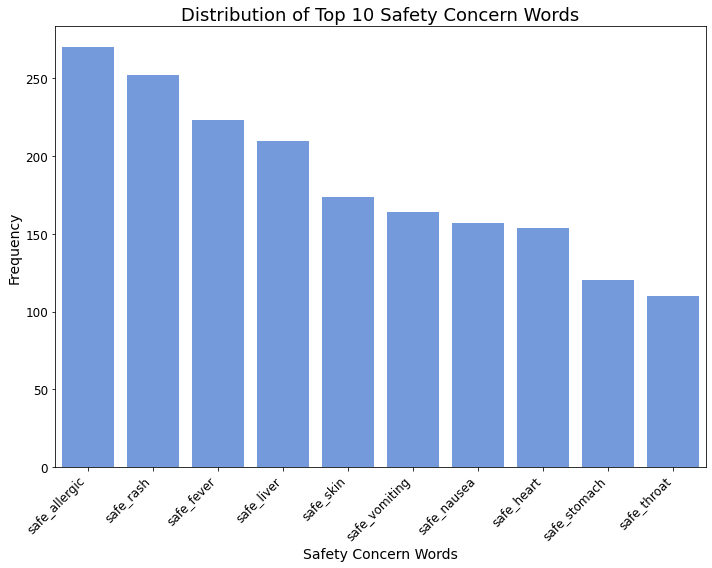

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of safety warning areas
safety_areas = ['safe_rash', 'safe_fever', 'safe_liver', 'safe_throat', 'safe_skin', 
                'safe_nausea', 'safe_vomiting', 'safe_allergic', 'safe_drowsiness', 
                'safe_stomach', 'safe_heart', 'safe_stroke', 
                'safe_lightheadedness', 'safe_sweating']

# Sum up the dummy variables for each safety warning area
safety_counts = df[safety_areas].sum()

# Select the top 10 safety warning areas
top_10_safety = safety_counts.nlargest(10)

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 safety warning areas
sns.barplot(x=top_10_safety.index, y=top_10_safety.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Safety Concern Words', fontsize=18)
plt.xlabel('Safety Concern Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [141]:
top_10_safety.index

Index(['safe_allergic', 'safe_rash', 'safe_fever', 'safe_liver', 'safe_skin',
       'safe_vomiting', 'safe_nausea', 'safe_heart', 'safe_stomach',
       'safe_throat'],
      dtype='object')

In [ ]:
#[Allergic, Rash, Fever, Liver, Skin, Vomiting, Nausea, Heart, Stomach, Throat]

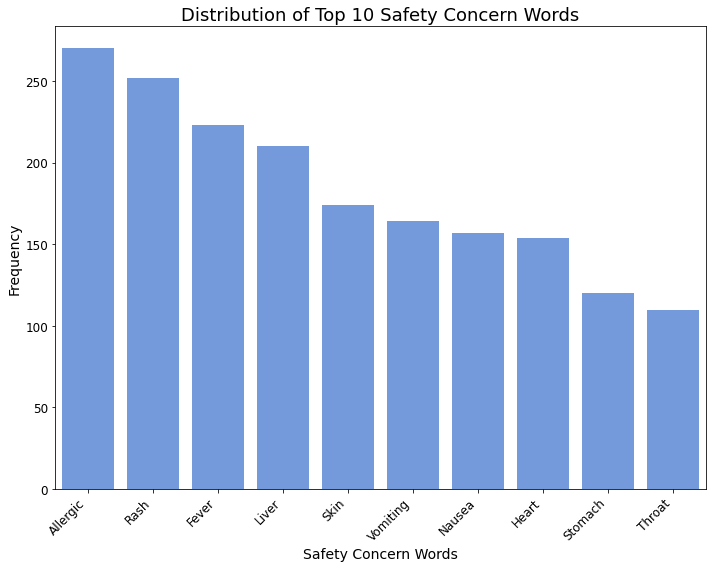

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of safety warning areas
safety_areas = ['safe_rash', 'safe_fever', 'safe_liver', 'safe_throat', 'safe_skin', 
                'safe_nausea', 'safe_vomiting', 'safe_allergic', 'safe_drowsiness', 
                'safe_stomach', 'safe_heart', 'safe_stroke', 
                'safe_lightheadedness', 'safe_sweating']

# Sum up the dummy variables for each safety warning area
safety_counts = df[safety_areas].sum()

# Select the top 10 safety warning areas
top_10_safety = safety_counts.nlargest(10)

# Renaming the index
top_10_safety.index = ['Allergic', 'Rash', 'Fever', 'Liver', 'Skin', 
                       'Vomiting', 'Nausea', 'Heart', 'Stomach', 'Throat']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create bar plot for the top 10 safety warning areas
sns.barplot(x=top_10_safety.index, y=top_10_safety.values, color='cornflowerblue')
plt.title('Distribution of Top 10 Safety Concern Words', fontsize=18)
plt.xlabel('Safety Concern Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [54]:
df.inch.quantile([.2,.4,.6,.8,.9,.95,.99])

0.20     12.588533
0.40     19.782203
0.60     30.000000
0.80     50.610938
0.90     98.948694
0.95    146.700000
0.99    360.000000
Name: inch, dtype: float64

In [56]:
df['count'].quantile([.2,.4,.6,.8,.9,.95,.99])

0.20      20.0
0.40      40.0
0.60      65.6
0.80     103.0
0.90     237.0
0.95     375.0
0.99    1000.0
Name: count, dtype: float64

In [ ]:
df['count'].quantile([.2,.4,.6,.8,.9,.95,.99])

In [42]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'cat', 'rating', 'reviews',
       'price', 'vp', 'fsa_flg', 'eff_max_str',
       ...
       'safe_nausea', 'safe_vomiting', 'safe_allergic', 'safe_drowsiness',
       'safe_stomach', 'safe_heart', 'safe_stroke', 'safe_heartburn',
       'safe_lightheadedness', 'safe_sweating'],
      dtype='object', length=173)

In [22]:
df.cat.value_counts()

cold    451
dig     366
alg     352
pain    276
Name: cat, dtype: int64

<AxesSubplot:ylabel='Frequency'>

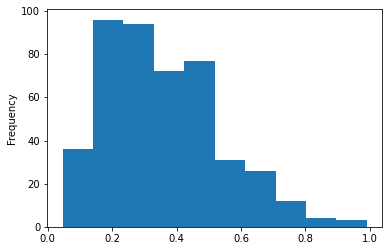

In [23]:
df[df.cat=='cold'].vp.plot.hist()

<AxesSubplot:ylabel='Frequency'>

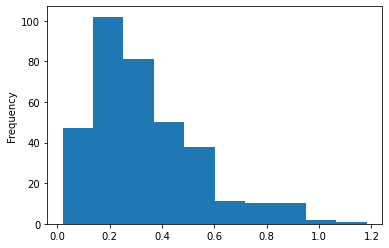

In [25]:
df[df.cat=='alg'].vp.plot.hist()

<AxesSubplot:ylabel='Frequency'>

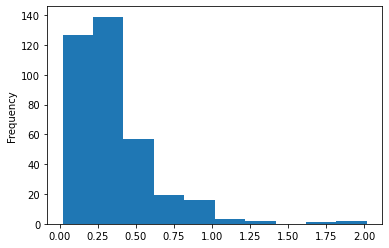

In [26]:
df[df.cat=='dig'].vp.plot.hist()

<AxesSubplot:ylabel='Frequency'>

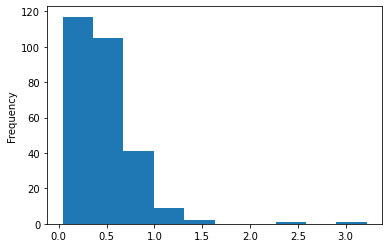

In [27]:
df[df.cat=='pain'].vp.plot.hist()

In [12]:
df.vp_cat3.value_counts()

0    726
1    719
Name: vp_cat3, dtype: int64

In [15]:
df.groupby('cat')['vp_cat3'].mean()

cat
alg     0.500000
cold    0.498891
dig     0.500000
pain    0.489130
Name: vp_cat3, dtype: float64

In [6]:
cold = df[df.cat == 'cold']

In [10]:
data[data.asin.isin(cold[(cold.reviews>500)&(cold.price>15)].asin)].to_excel('sample.xlsx')

In [12]:
df.shape

(1445, 173)

In [192]:
df.cat.value_counts()

cold    451
dig     366
alg     352
pain    276
Name: cat, dtype: int64

In [158]:
#df['safe_count'].mean()

1.5217993079584775

In [193]:
df['y_class'] = df['vp_cat3']

In [194]:
df.columns[12:50]

Index(['eff_non_drowsy', 'eff_kid', 'sym_throat', 'sym_stomach',
       'sym_sneezing', 'sym_sinus', 'sym_pain', 'sym_nose', 'sym_nausea',
       'sym_nasal', 'sym_migranie', 'sym_menstrual', 'sym_itchy', 'sym_heart',
       'sym_headache', 'sym_flu', 'sym_fever', 'sym_eyes', 'sym_digestion',
       'sym_cough', 'sym_cold', 'sym_chest', 'sym_arthritis', 'sym_allergy',
       'sym_acid', 'ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali'],
      dtype='object')

In [195]:
# Create sym_count by counting the occurrences of 1's across sym features
df['sym_count'] = df[['sym_throat', 'sym_stomach', 'sym_sneezing', 'sym_sinus', 
                      'sym_pain', 'sym_nose', 'sym_nausea', 'sym_nasal', 'sym_migranie', 
                      'sym_menstrual', 'sym_itchy', 'sym_heart', 'sym_headache', 'sym_flu',
                      'sym_fever', 'sym_eyes', 'sym_digestion', 'sym_cough', 'sym_cold', 'sym_chest',
                      'sym_arthritis', 'sym_allergy', 'sym_acid']].sum(axis=1)

In [196]:
df['safe_count'] = df[['safe_rash', 'safe_fever', 'safe_liver',
       'safe_throat', 'safe_skin', 'safe_nausea', 'safe_vomiting',
       'safe_allergic', 'safe_drowsiness', 'safe_stomach', 'safe_heart',
       'safe_stroke', 'safe_heartburn', 'safe_lightheadedness',
       'safe_sweating']].sum(axis=1)

In [197]:
X_features = ['sym_count','fsa_flg', 'eff_max_str', 'eff_fast_acting', 'eff_long_lasting',
       'eff_non_drowsy', 'eff_kid', 'ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali',
       'ingre_ipecacuanha', 'ingre_ibuprofen', 'ingre_hydrobromide',
       'ingre_guaifenesin', 'ingre_gelsemium', 'ingre_fexofenadine',
       'ingre_famotidine', 'ingre_eupatorium', 'ingre_eucalyptus',
       'ingre_esomeprazole', 'ingre_echinacea', 'ingre_doxylamine',
       'ingre_diphenhydramine', 'ingre_dextromethorphan',
       'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
       'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
       'ingre_acetaminophen', 'brand_zyrtec', 'brand_zicam',
       'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 'brand_tums',
       'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids',
       'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec',
       'brand_prelief', 'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium',
       'brand_natures_way', 'brand_mylanta', 'brand_mucinex', 'brand_motrin',
       'brand_midol', 'brand_major', 'brand_hylands', 'brand_goodsense',
       'brand_gaviscon', 'brand_flonase', 'brand_excedrin',
       'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic',
       'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care',
       'brand_allegra', 'brand_alka_seltzer_plus', 'brand_alka_seltzer',
       'brand_aleve', 'brand_airborne', 'brand_advil', 'brand_a2z_store',
       'manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
       'manu_pg', 'manu_sanofi', 'manu_ama', 'manu_major', 'manu_rite',
       'manu_boiron', 'manu_pfizer', 'manu_hyland', 'manu_alka',
       'manu_allegiant', 'manu_prestige', 'manu_dwight', 'manu_emc', 'manu_nw',
       'manu_walmart', 'manu_kirkland', 'manu_ohm', 'manu_reddy',
       'manu_bionpharma', 'manu_time', 'count_q_00', 'count_q_10',
       'count_q_20', 'count_q_30', 'inch_q_00', 'inch_q_10', 'inch_q_20',
       'inch_q_30', 'weight_q_00', 'weight_q_10', 'weight_q_20', 'weight_q_30',
             'safe_count']

In [198]:
data = df[df.cat=='cold'][X_features+['y_class','vp', 'cat', 'asin', 'rating', 'reviews', 'price']]

In [199]:
data.y_class.value_counts()

0    226
1    225
Name: y_class, dtype: int64

In [159]:
data.safe_count.mean()

1.6141906873614191

In [162]:
data[data.safe_count<1].rating.mean(), data[data.safe_count<1].price.mean()

(4.569565217391306, 19.08083850931672)

In [163]:
data[data.safe_count>=1].rating.mean(), data[data.safe_count>=1].price.mean()

(4.682170542635661, 12.950697674418613)

In [213]:
##data.safe_count.mean()

In [201]:
## binary safe count
data['safe_warn'] = 0
data.loc[data.safe_count>=1, 'safe_warn'] = 1

In [208]:
data.groupby('safe_count')['vp'].agg(['count', 'mean'])

,count,mean
safe_count,,
0,322,0.329716
1,13,0.393139
2,24,0.391470
3,4,0.468047
4,2,0.487705
5,20,0.415628
6,3,0.452184
7,17,0.366599
8,18,0.436415


In [206]:
from scipy.stats import chi2_contingency

# Selecting relevant columns for each group
#group1 = data[data['safe_count'] >= 1]
#group2 = data[data['safe_count'] == 0]

# Ingredients to compare
ingredients_to_compare = ['ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali',
       'ingre_ipecacuanha', 'ingre_ibuprofen', 'ingre_hydrobromide',
       'ingre_guaifenesin', 'ingre_gelsemium', 'ingre_fexofenadine',
       'ingre_famotidine', 'ingre_eupatorium', 'ingre_eucalyptus',
       'ingre_esomeprazole', 'ingre_echinacea', 'ingre_doxylamine',
       'ingre_diphenhydramine', 'ingre_dextromethorphan',
       'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
       'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
       'ingre_acetaminophen']

# Initialize a DataFrame to store the chi-square test results
results = pd.DataFrame(columns=['Ingredient', 'Chi-Square Statistic', 'P-value', 'Count'])

# Perform chi-square test for each ingredient
for ingredient in ingredients_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(data['safe_warn'], data[ingredient])
    
    # Check if there is data in the contingency table
    if contingency_table.size > 0:
        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Append the results to the DataFrame
        results = results.append({'Ingredient': ingredient,
                                  'Chi-Square Statistic': chi2,
                                  'P-value': p,
                                 'Count': sum(data[ingredient])}, ignore_index=True)

# Display the results
print(results[results['P-value']<0.05])

                Ingredient  Chi-Square Statistic       P-value Count
3         ingre_phosphorus              3.960452  4.658119e-02    17
4      ingre_phenylephrine             35.309955  2.811911e-09   106
5        ingre_perfoliatum              6.936184  8.446911e-03    12
13       ingre_ipecacuanha              4.410719  3.571378e-02    14
15      ingre_hydrobromide             17.633946  2.677660e-05    32
16       ingre_guaifenesin              5.991915  1.437159e-02    85
17         ingre_gelsemium              5.983763  1.443816e-02    15
20        ingre_eupatorium              8.867729  2.902560e-03    13
24        ingre_doxylamine             39.091025  4.044991e-10    40
26  ingre_dextromethorphan             41.391094  1.246239e-10   131
30           ingre_bryonia              5.433375  1.975547e-02    23
33     ingre_acetaminophen             40.737509  1.741128e-10   112


In [142]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset and split into training, validation, and testing sets

X_train, y_train, z = data[X_features], data['y_class'], data['vp']
# X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42, stratify=y)


# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(early_stopping=True, max_iter=1000,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Hyperparameters for grid search
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200,300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__bootstrap':[True,False]
    }
     ,
    'XGBoost': {
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__n_estimators': [100, 200,300],
        'classifier__max_depth': [3, 5, 7],
    },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
    }
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

for name, model in models.items():
    print(f"===== {name} =====")
    
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # If the model has hyperparameters to tune, apply GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
#         if name == 'Random Forest':
#             rf_model = best_pipeline
        # Output the best hyperparameters for each model
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)
    
    if name == 'Random Forest':
        rf_model = best_pipeline
    if name == 'XGBoost':
        gb_model = best_pipeline
    if name == 'LDA':
        lda_model = best_pipeline
    if name == 'Logistic Regression':
        lr_model = best_pipeline
    
    # Cross-Validation metrics
    cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5, scoring=scoring)
    
    for metric in scoring.keys():
        mean_metric = np.mean(cv_results[f'test_{metric}'])
        std_metric = np.std(cv_results[f'test_{metric}'])
        print(cv_results[f'test_{metric}'],f"{metric.capitalize()}: {mean_metric:.4f} ± {std_metric:.4f}")

        
    print()

===== Logistic Regression =====


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.63736264 0.68888889 0.72222222 0.65555556 0.47777778] Accuracy: 0.6364 ± 0.0844
[0.58823529 0.65454545 0.75       0.73333333 0.46666667] Precision: 0.6386 ± 0.1037
[0.88888889 0.8        0.66666667 0.48888889 0.31111111] Recall: 0.6311 ± 0.2092
[0.7079646  0.72       0.70588235 0.58666667 0.37333333] F1: 0.6188 ± 0.1320
[0.68599034 0.79160494 0.75604938 0.75160494 0.54691358] Roc_auc: 0.7064 ± 0.0867

===== Decision Tree =====
[0.52747253 0.66666667 0.67777778 0.66666667 0.62222222] Accuracy: 0.6322 ± 0.0557
[0.51851852 0.64150943 0.69047619 0.71428571 0.66666667] Precision: 0.6463 ± 0.0683
[0.62222222 0.75555556 0.64444444 0.55555556 0.48888889] Recall: 0.6133 ± 0.0896
[0.56565657 0.69387755 0.66666667 0.625      0.56410256] F1: 0.6231 ± 0.0523
[0.52850242 0.66666667 0.67777778 0.6308642  0.62222222] Roc_auc: 0.6252 ± 0.0527

===== MLP =====
Best hyperparameters for MLP: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__solver': 'adam'}
[0.

In [143]:
#best_pipeline

# Variable importance

In [144]:
## 1shap

In [145]:
#pip install shap

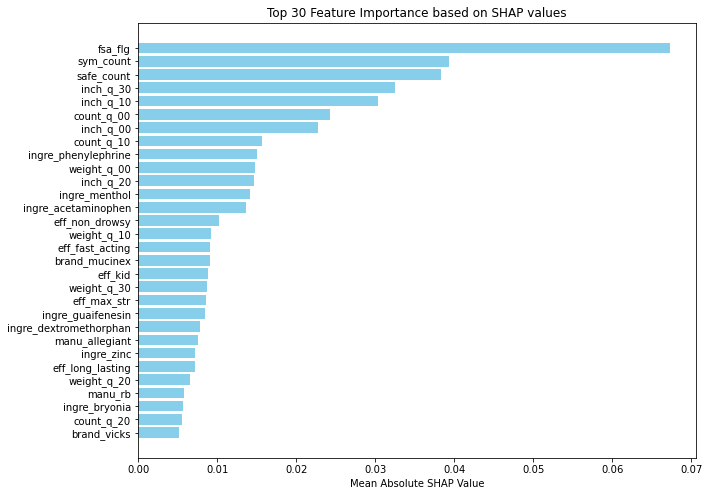

In [146]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_model.named_steps['classifier'])
shap_values = explainer.shap_values(X_train)

# Calculate absolute mean SHAP values
mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)  # Considering only the positive class

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Get indices of top 30 features sorted by absolute SHAP values
top_indices = np.argsort(mean_abs_shap_values)[::-1][:30]

# Select top 30 feature names and corresponding mean absolute SHAP values
top_feature_names = [feature_names[i] for i in top_indices]
top_mean_abs_shap_values = mean_abs_shap_values[top_indices]

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_feature_names)), top_mean_abs_shap_values, align='center', color='skyblue')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 30 Feature Importance based on SHAP values')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [ ]:
## safe count tricky (phen, acetamin, dex)

In [147]:
top_mean_abs_shap_values

array([0.06723903, 0.03940049, 0.03833668, 0.03251326, 0.03034954,
       0.02432674, 0.02279859, 0.0157373 , 0.0150941 , 0.01474666,
       0.01466019, 0.01419067, 0.01370785, 0.01025868, 0.00924783,
       0.00915865, 0.00907214, 0.00885787, 0.00878363, 0.00854915,
       0.00843044, 0.0078912 , 0.00761954, 0.00723391, 0.00719403,
       0.00655496, 0.00575395, 0.00571269, 0.00553868, 0.00520354])

In [154]:
np.quantile(mean_abs_shap_values,0.95)

0.02295140877412893

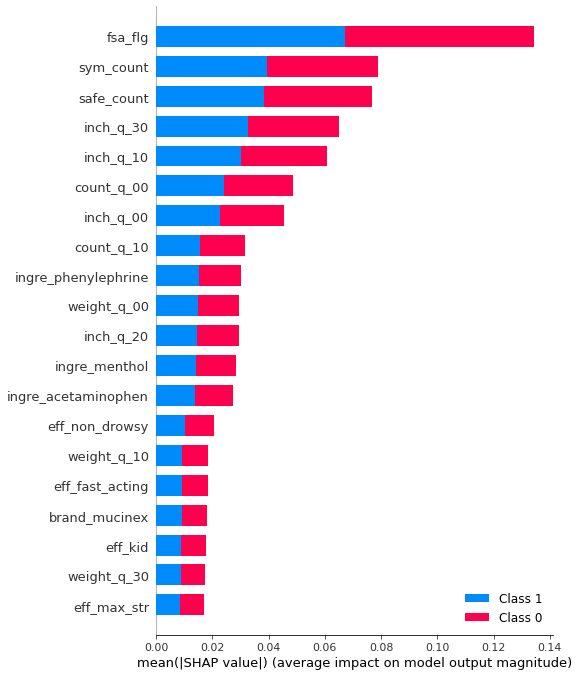

In [149]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already calculated SHAP values and defined the explainer
# Create a summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)

# Show the plot
plt.show()

In [150]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Access feature importances from the Random Forest model
# feature_importances = rf_model.named_steps['classifier'].feature_importances_

# # Create a DataFrame to store feature importances
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# # Sort the DataFrame by Importance in descending order
# feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# # Output the top 30 features
# top_30_features = feature_importance_df.head(25)
# print(top_30_features)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(top_30_features['Feature'], top_30_features['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Top 30 Feature Importance from Random Forest Model')
# plt.show()

In [151]:
## logistic regression feat importance

In [152]:
import pandas as pd

# Extract coefficient estimates
coefficients = lr_model.named_steps['classifier'].coef_[0]

# Calculate p-values (not directly available in scikit-learn)
# You would typically use statsmodels for p-values with logistic regression

# Create a DataFrame to store coefficients and p-values
variable_info = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Calculate absolute coefficients
variable_info['Absolute Coefficient'] = abs(variable_info['Coefficient'])

# Sort variables based on absolute coefficient values
variable_info.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# You should determine statistical significance based on your chosen method
# Since we don't have p-values directly, you might need to use other statistical tools
# For demonstration purposes, I'm assuming all coefficients are statistically significant
variable_info['Significance'] = True

# Print the ranked variables and their statistical significance
#print(variable_info[:20])

In [153]:
import pandas as pd

# Assuming you have a DataFrame named 'top_feature_names' containing the names of the top features
# and another DataFrame named 'variable_info' containing information about all features

# Filter variable_info to include only rows where the Feature is in top_feature_names
filtered_variable_info = variable_info[variable_info['Feature'].isin(top_feature_names)]

# Order filtered_variable_info by the top_feature_names list
ordered_variable_info = filtered_variable_info.set_index('Feature').loc[top_feature_names].reset_index()
ordered_variable_info

,Feature,Coefficient,Absolute Coefficient,Significance
0,fsa_flg,0.989266,0.989266,True
1,sym_count,0.078064,0.078064,True
2,safe_count,0.050957,0.050957,True
3,inch_q_30,-0.944499,0.944499,True
4,inch_q_10,0.963720,0.963720,True
5,count_q_00,0.499849,0.499849,True
6,inch_q_00,0.965564,0.965564,True
7,count_q_10,-0.996590,0.996590,True
8,ingre_phenylephrine,0.372500,0.372500,True
9,weight_q_00,0.453672,0.453672,True
